Group Members
1.   Lisa Amimo IN14/00042/21
2.   Emma Mwangi IN14/00007/20







In [ ]:
!pip install keras nltk numpy
print('installed')

installed


In [ ]:
from __future__ import print_function
!pip install nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sys
import numpy as np
import re
import random
import pickle
from nltk.corpus import gutenberg
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, Dropout
from keras.layers import SimpleRNN, GRU, BatchNormalization
from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.utils import get_file

In [ ]:
from nltk.corpus import gutenberg
import nltk
nltk.download('gutenberg')
# Load Hamlet from the Gutenberg corpus
hamlet = gutenberg.words('shakespeare-hamlet.txt')

# Convert words to lowercase and join them into a single string
text = ' '.join(hamlet).lower()

print("Text length:", len(text))
print("Sample text:", text[:500])

print('Corpus length, Hamlet only:', len(text))

Text length: 166764
Sample text: [ the tragedie of hamlet by william shakespeare 1599 ] actus primus . scoena prima . enter barnardo and francisco two centinels . barnardo . who ' s there ? fran . nay answer me : stand & vnfold your selfe bar . long liue the king fran . barnardo ? bar . he fran . you come most carefully vpon your houre bar . ' tis now strook twelue , get thee to bed francisco fran . for this releefe much thankes : ' tis bitter cold , and i am sicke at heart barn . haue you had quiet guard ? fran . not a mouse s
Corpus length, Hamlet only: 166764


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
# Create dictionaries for mapping characters
char_to_index = {char: i for i, char in enumerate(characters)}
index_to_char = {i: char for i, char in enumerate(characters)}

print("Unique characters:", characters)
print("Total unique characters:", len(characters))

Unique characters: [' ', '!', '&', "'", '(', ')', ',', '-', '.', '1', '5', '9', ':', ';', '?', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total unique characters: 43


In [ ]:
import numpy as np

# Create a dictionary of unique characters
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Sequence length and stride
seq_length = 40
stride = 3

# Generate sequences
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, stride):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Total sequences: {len(sequences)}")

Total sequences: 55575


In [ ]:
num_samples = 5  # Number of examples to print

for i in range(num_samples):
    # Convert sequence indices back to characters
    sequence_text = ''.join(indices_char[idx] for idx in X[i])
    next_char = indices_char[y[i]]  # Convert the next character index

    print(f'Sample {i+1}: "{sequence_text}" -> "{next_char}"')

Sample 1: "[ the tragedie of hamlet by william shak" -> "e"
Sample 2: " the tragedie of hamlet by william shake" -> "s"
Sample 3: "the tragedie of hamlet by william shakes" -> "p"
Sample 4: "he tragedie of hamlet by william shakesp" -> "e"
Sample 5: "e tragedie of hamlet by william shakespe" -> "a"


In [ ]:
# Check unique characters before preprocessing
original_characters = sorted(set(gutenberg.raw('shakespeare-hamlet.txt')))
print("Total unique characters before processing:", len(original_characters))
print(original_characters)

# Check unique characters after preprocessing
processed_characters = sorted(set(text))
print("Total unique characters after processing:", len(processed_characters))
print(processed_characters)

Total unique characters before processing: 67
['\n', ' ', '!', '&', "'", '(', ')', ',', '-', '.', '1', '5', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total unique characters after processing: 43
[' ', '!', '&', "'", '(', ')', ',', '-', '.', '1', '5', '9', ':', ';', '?', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
import numpy as np

# Create a dictionary of unique characters
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Define sequence length and stride
seq_length = 40
stride = 3

# Generate sequences
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, stride):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Total sequences: {len(sequences)}")
# Convert to NumPy arrays
num_sequences = len(sequences)
num_unique_chars = len(chars)


X_one_hot = np.zeros((num_sequences, seq_length, num_unique_chars), dtype=np.float32)
y_one_hot = np.zeros((num_sequences, num_unique_chars), dtype=np.float32)

# Fill the one-hot encoded arrays
for i, sequence in enumerate(sequences):
    for j, char in enumerate(sequence):
        X_one_hot[i, j, char_to_idx[char]] = 1
    y_one_hot[i, char_to_idx[next_chars[i]]] = 1

print("Shape of X_one_hot:", X_one_hot.shape)
print("Shape of y_one_hot:", y_one_hot.shape)


Total sequences: 55575
Shape of X_one_hot: (55575, 40, 43)
Shape of y_one_hot: (55575, 43)


In [ ]:
import numpy as np

# Compute character frequency in the dataset
char_counts = {char: text.count(char) for char in set(text)}

# Normalize to get probabilities
total_chars = sum(char_counts.values())
char_probs = {char: count / total_chars for char, count in char_counts.items()}

# Print probability distribution
print("Character Probabilities:")
for char, prob in sorted(char_probs.items(), key=lambda x: x[1], reverse=True)[:10]:  # Top 10 characters
    print(f"'{char}': {prob:.4f}")

Character Probabilities:
' ': 0.2240
'e': 0.0980
't': 0.0651
'o': 0.0626
'a': 0.0541
'h': 0.0492
'i': 0.0476
'n': 0.0456
's': 0.0454
'r': 0.0429


In [ ]:
import numpy as np

# Character probabilities based on given values
char_probs = {
    ' ': 0.2240,
    'e': 0.0980,
    't': 0.0651,
    'o': 0.0626,
    'a': 0.0541,
    'h': 0.0492,
    'i': 0.0476,
    'n': 0.0456,
    's': 0.0454,
    'r': 0.0429
}

# Create index mappings
idx_to_char = {i: char for i, char in enumerate(char_probs.keys())}
char_to_idx = {char: i for i, char in enumerate(char_probs.keys())}

# Convert dictionary to a probability array
preds = np.array([char_probs[char] for char in char_probs.keys()])

# Greedy sampling function
def greedy_sample(preds):
    return idx_to_char[np.argmax(preds)]


result = greedy_sample(preds)
print("Greedy sampled character:", result)

Greedy sampled character:  


In [ ]:
import numpy as np

# Character probabilities based on given values
char_probs = {
    ' ': 0.2240,
    'e': 0.0980,
    't': 0.0651,
    'o': 0.0626,
    'a': 0.0541,
    'h': 0.0492,
    'i': 0.0476,
    'n': 0.0456,
    's': 0.0454,
    'r': 0.0429
}

# Create index mappings
idx_to_char = {i: char for i, char in enumerate(char_probs.keys())}
char_to_idx = {char: i for i, char in enumerate(char_probs.keys())}

# Convert dictionary to a probability array
preds = np.array([char_probs[char] for char in char_probs.keys()])

# Stochastic sampling function
def stochastic_sample(preds):
    preds = preds / np.sum(preds)  # Normalize to ensure it's a valid probability distribution
    return np.random.choice(list(char_probs.keys()), p=preds)

# Sample a character
result = stochastic_sample(preds)
print("Stochastically sampled character:", result)

Stochastically sampled character: o


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input
from keras.optimizers import RMSprop

seq_len = 40
characters = sorted(set(text))  # Unique characters from dataset
num_chars = len(characters)  # Number of unique characters

def SimpleRNN_stacked_model():
    model = Sequential([
        Input(shape=(seq_len, num_chars)),
        SimpleRNN(128, return_sequences=True),
        SimpleRNN(128),
        Dense(num_chars, activation='softmax')  # Output layer
    ])

    optimizer = RMSprop(learning_rate=0.01)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = SimpleRNN_stacked_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 40, 128)             │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,459 (236.17 KB)

 Trainable params: 60,459 (236.17 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Print all unique characters in the text
print("Unique characters in text:", sorted(set(text)))

# Print dictionary keys
print("Characters in char_to_idx:", char_to_idx.keys())

Unique characters in text: [' ', '!', '&', "'", '(', ')', ',', '-', '.', '1', '5', '9', ':', ';', '?', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Characters in char_to_idx: dict_keys([' ', 'e', 't', 'o', 'a', 'h', 'i', 'n', 's', 'r'])


In [ ]:
chars = sorted(set(text))  # Extract unique characters from text
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

print("Updated char_to_idx:", char_to_idx)

Updated char_to_idx: {' ': 0, '!': 1, '&': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '1': 9, '5': 10, '9': 11, ':': 12, ';': 13, '?': 14, '[': 15, ']': 16, 'a': 17, 'b': 18, 'c': 19, 'd': 20, 'e': 21, 'f': 22, 'g': 23, 'h': 24, 'i': 25, 'j': 26, 'k': 27, 'l': 28, 'm': 29, 'n': 30, 'o': 31, 'p': 32, 'q': 33, 'r': 34, 's': 35, 't': 36, 'u': 37, 'v': 38, 'w': 39, 'x': 40, 'y': 41, 'z': 42}


In [ ]:
import tensorflow as tf
from keras import backend as K

K.clear_session()
tf.keras.backend.clear_session()


In [ ]:
K.clear_session()
tf.keras.backend.clear_session()

model = SimpleRNN_stacked_model()
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [ ]:
checkpoint = ModelCheckpoint("rnn_text_gen.h5", monitor='loss', save_best_only=True)

model.fit(X_one_hot, y_one_hot, batch_size=128, epochs=20, callbacks=[checkpoint])


Epoch 1/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.2647 - loss: 2.6763

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.2649 - loss: 2.6752
Epoch 2/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3946 - loss: 2.1035

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.3947 - loss: 2.1033
Epoch 3/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4222 - loss: 1.9659

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.4223 - loss: 1.9658
Epoch 4/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4462 - loss: 1.8702

435/435 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.4462 - loss: 1.8701
Epoch 5/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4714 - loss: 1.7871

435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 87ms/step - accuracy: 0.4714 - loss: 1.7871
Epoch 6/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4797 - loss: 1.7407

435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 87ms/step - accuracy: 0.4797 - loss: 1.7406
Epoch 7/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5006 - loss: 1.6727

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.5005 - loss: 1.6727
Epoch 8/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5069 - loss: 1.6440

435/435 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.5069 - loss: 1.6439
Epoch 9/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5219 - loss: 1.6069

435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 87ms/step - accuracy: 0.5219 - loss: 1.6069
Epoch 10/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5271 - loss: 1.5780

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.5271 - loss: 1.5780
Epoch 11/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5351 - loss: 1.5404

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.5351 - loss: 1.5404
Epoch 12/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5447 - loss: 1.5085

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.5447 - loss: 1.5086
Epoch 13/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5534 - loss: 1.4814

435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.5534 - loss: 1.4814
Epoch 14/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5595 - loss: 1.4639

435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.5595 - loss: 1.4639
Epoch 15/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5659 - loss: 1.4360

435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.5659 - loss: 1.4360
Epoch 16/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5724 - loss: 1.4192

435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.5724 - loss: 1.4193
Epoch 17/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5797 - loss: 1.3890

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.5796 - loss: 1.3891
Epoch 18/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5827 - loss: 1.3827

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.5827 - loss: 1.3827
Epoch 19/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5884 - loss: 1.3611

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.5884 - loss: 1.3611
Epoch 20/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5971 - loss: 1.3317

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.5970 - loss: 1.3318


In [ ]:

#generate text
import random

# Function to generate text
def generate_text(seed_text, length=200):
    generated = seed_text
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed_text):
            x_pred[0, t, char_to_idx[char]] = 1

        predictions = model.predict(x_pred, verbose=0)[0]
        next_char = idx_to_char[np.argmax(predictions)]

        generated += next_char
        seed_text = seed_text[1:] + next_char  # Shift input

    return generated

start_index = random.randint(0, len(text) - seq_length - 1)
seed = text[start_index:start_index + seq_length]
print(generate_text(seed))


ssume a pleasing shape , yea and perhaps thee the such of the sencle , and the senter the more , the stake heere thee the start , the king , the storne , the stare , that i haue the heare , that i haue the heare , that i haue the heare , th


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint

# Define model architecture
def build_gru_model(seq_length, num_unique_chars):
    model = Sequential([
        GRU(256, return_sequences=True, input_shape=(seq_length, num_unique_chars)),
        Dropout(0.2),
        GRU(256),
        Dense(num_unique_chars),
        Activation('softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize model
model_gru = build_gru_model(seq_length=40, num_unique_chars=len(char_to_idx))

# Define ModelCheckpoint to save best model
checkpoint = ModelCheckpoint("gru_text_gen.h5", monitor='loss', save_best_only=True, verbose=1)

# Train the GRU model
model_gru.fit(X_one_hot, y_one_hot, batch_size=128, epochs=20, callbacks=[checkpoint])


Epoch 1/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.2837 - loss: 2.6208
Epoch 1: loss improved from inf to 2.30787, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 274s 620ms/step - accuracy: 0.2838 - loss: 2.6201
Epoch 2/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.4223 - loss: 1.9592
Epoch 2: loss improved from 2.30787 to 1.91923, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 319s 613ms/step - accuracy: 0.4223 - loss: 1.9592
Epoch 3/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.4628 - loss: 1.7927
Epoch 3: loss improved from 1.91923 to 1.76521, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 265s 610ms/step - accuracy: 0.4629 - loss: 1.7926
Epoch 4/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.4925 - loss: 1.6767
Epoch 4: loss improved from 1.76521 to 1.65547, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 324s 614ms/step - accuracy: 0.4925 - loss: 1.6767
Epoch 5/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.5245 - loss: 1.5664
Epoch 5: loss improved from 1.65547 to 1.56787, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 324s 619ms/step - accuracy: 0.5245 - loss: 1.5664
Epoch 6/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.5483 - loss: 1.4860
Epoch 6: loss improved from 1.56787 to 1.49084, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 322s 618ms/step - accuracy: 0.5483 - loss: 1.4860
Epoch 7/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.5733 - loss: 1.4005
Epoch 7: loss improved from 1.49084 to 1.42287, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 318s 611ms/step - accuracy: 0.5733 - loss: 1.4006
Epoch 8/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.5855 - loss: 1.3522
Epoch 8: loss improved from 1.42287 to 1.35471, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 324s 615ms/step - accuracy: 0.5855 - loss: 1.3522
Epoch 9/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.6015 - loss: 1.2798
Epoch 9: loss improved from 1.35471 to 1.29072, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 322s 615ms/step - accuracy: 0.6015 - loss: 1.2798
Epoch 10/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.6264 - loss: 1.2026
Epoch 10: loss improved from 1.29072 to 1.22637, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 323s 617ms/step - accuracy: 0.6264 - loss: 1.2027
Epoch 11/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.6418 - loss: 1.1431
Epoch 11: loss improved from 1.22637 to 1.16225, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 323s 619ms/step - accuracy: 0.6417 - loss: 1.1432
Epoch 12/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.6597 - loss: 1.0739
Epoch 12: loss improved from 1.16225 to 1.10199, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 320s 614ms/step - accuracy: 0.6597 - loss: 1.0740
Epoch 13/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.6793 - loss: 1.0194
Epoch 13: loss improved from 1.10199 to 1.04105, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 266s 612ms/step - accuracy: 0.6793 - loss: 1.0194
Epoch 14/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7016 - loss: 0.9555
Epoch 14: loss improved from 1.04105 to 0.98289, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 323s 614ms/step - accuracy: 0.7016 - loss: 0.9555
Epoch 15/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.7143 - loss: 0.9063
Epoch 15: loss improved from 0.98289 to 0.92488, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 270s 621ms/step - accuracy: 0.7142 - loss: 0.9063
Epoch 16/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7384 - loss: 0.8359
Epoch 16: loss improved from 0.92488 to 0.87262, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 319s 615ms/step - accuracy: 0.7384 - loss: 0.8360
Epoch 17/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.7549 - loss: 0.7829
Epoch 17: loss improved from 0.87262 to 0.81639, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 321s 613ms/step - accuracy: 0.7549 - loss: 0.7830
Epoch 18/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7703 - loss: 0.7375
Epoch 18: loss improved from 0.81639 to 0.77277, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 323s 614ms/step - accuracy: 0.7703 - loss: 0.7376
Epoch 19/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.7822 - loss: 0.7006
Epoch 19: loss improved from 0.77277 to 0.73076, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 319s 609ms/step - accuracy: 0.7822 - loss: 0.7007
Epoch 20/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.7955 - loss: 0.6525
Epoch 20: loss improved from 0.73076 to 0.68274, saving model to gru_text_gen.h5


435/435 ━━━━━━━━━━━━━━━━━━━━ 266s 611ms/step - accuracy: 0.7954 - loss: 0.6525


In [64]:
import random
start_index = random.randint(0, len(text) - len(seed_text) - 1)
seed = text[start_index:start_index + len(seed_text)]
print(generate_text(seed, length=200, temperature=0.2))  # Adjust length & temp as needed

nto the lobby king . go seeke him there ham . what is some marriage , i had not the cappiert to the chall hamlet . hor . she thou hads not some marriage , i had prease as made to make an eaded , and the stage is the tood come to get to him


LSTM Stock Market Data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
uploaded = files.upload()
uploaded.head()

Saving all_stocks_5yr.csv to all_stocks_5yr (1).csv


AttributeError: 'dict' object has no attribute 'head'

In [75]:
filename = list(uploaded.keys())[0]

# Load the file into a Pandas DataFrame
df = pd.read_csv(filename)

# Display the first few rows
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


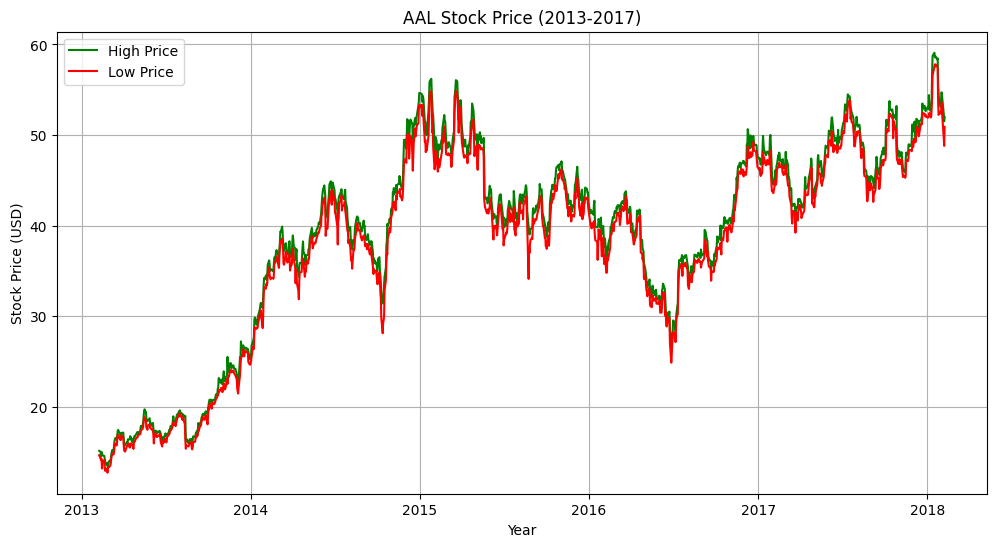

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('all_stocks_5yr.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort dataset by date
df = df.sort_values(by='date')

# Select stock for American Airlines Group (AAL)
aal_df = df[df['Name'] == 'AAL']

# Plot high and low prices over time
plt.figure(figsize=(12, 6))
plt.plot(aal_df['date'], aal_df['high'], label='High Price', color='green')
plt.plot(aal_df['date'], aal_df['low'], label='Low Price', color='red')

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('AAL Stock Price (2013-2017)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()



In [79]:
# Extract high and low prices
high_prices = aal_df['high'].values
low_prices = aal_df['low'].values

# Calculate mid prices
mid_prices = (high_prices + low_prices) / 2.0

# Check shape
print("Shape of mid_prices:", mid_prices.shape)


Shape of mid_prices: (1259,)


In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
aal_df = df[df['Name'] == 'AAL'].copy()
aal_df['date'] = pd.to_datetime(aal_df['date'])
aal_df.sort_values('date', inplace=True)

# Select the feature for prediction
prices = aal_df[['close']].values

# Normalize prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

seq_length = 50
X, y = [], []

for i in range(len(prices_scaled) - seq_length):
    X.append(prices_scaled[i:i + seq_length])
    y.append(prices_scaled[i + seq_length])

# Convert to NumPy arrays
X, y = np.array(X), np.array(y)

# Print shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (1209, 50, 1)
Shape of y: (1209, 1)


In [81]:
from sklearn.model_selection import train_test_split

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print shapes
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set: X_train: (967, 50, 1), y_train: (967, 1)
Testing set: X_test: (242, 50, 1), y_test: (242, 1)


In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
model.summary()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0726 - val_loss: 0.0165
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0028 - va

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 363,905 (1.39 MB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,604 (947.68 KB)

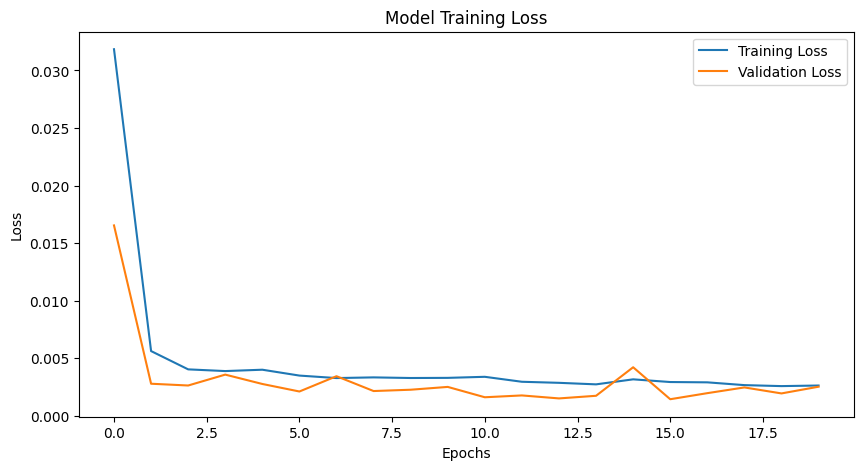

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss')
plt.legend()
plt.show()

In [84]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

y_pred_actual = y_pred_actual.flatten()
y_test_actual = y_test_actual.flatten()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


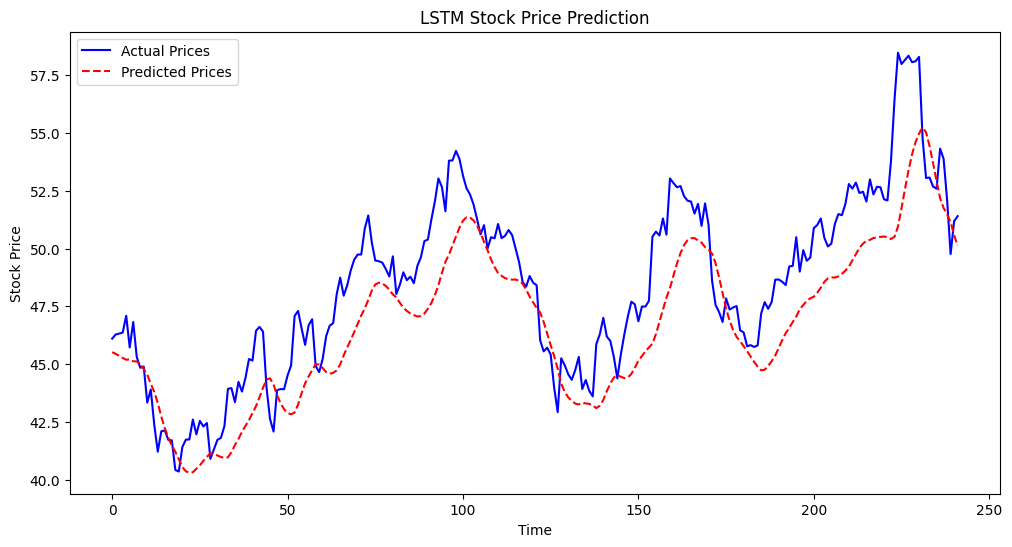

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Prices", color='blue')
plt.plot(y_pred_actual, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("LSTM Stock Price Prediction")
plt.legend()
plt.show()